# 機器學習_ML_MLPClassifier
[官方連結](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)  
This model optimizes the log-loss function using **LBFGS** or **stochastic gradient descent**.  
這說明了，在sklearn中，MLP是利用隨機梯度或是LBFGS來做權重(參數)$\theta$的計算。  
神經網路是最近非常熱門的一門顯學，MLP意為多層類神經網路。何謂多層，即有輸入層、輸出層跟至少一個隱藏層。  
![](https://i.imgur.com/3ko2rlj.png)  
借用了官網照片，X那層即為輸入層，OUPUT即為輸出層，中間的a即為隱藏層。  
下層單元與上層各單位都會有交錯到!  
一般的表示方式為$a^{(2)}$代表第二層。  
借用吳恩達老師上課的一個式子  
$a_1^{(2)} = g(\Theta_{10}^{(1)}x_0 + \Theta_{11}^{(1)}x_1 + \Theta_{12}^{(1)}x_2 + \Theta_{13}^{(1)}x_3)$  
$\Theta$的下標的部份，$\Theta_{10}$中的1所指為下一層所對應單元，0為這一層的對應單元。  
所以$a^{(2)}_1=\Theta^{(1)}_{10}+....$就是，第二層的第一個單元來自於第一層的第0+1+2+3單元的值。  
注意到後面的啟動函式是$\Theta^1$。  
而$\Theta$即為權重(參數)  
這邊主要談的是實用性，所以對於觀念性的部份就不多說，再另外補充  

## 優缺點
優點：  
* Capability to learn non-linear models.
* Capability to learn models in real-time (on-line learning) using partial_fit.

缺點：  
* MLP with hidden layers have a non-convex loss function where there exists more than one local minimum. Therefore different random weight initializations can lead to different validation accuracy.
* MLP requires tuning a number of hyperparameters such as the number of hidden neurons, layers, and iterations.
* MLP is sensitive to feature scaling.

sklearn官方說明中也提到兩個關於MLP的優點，第一點是可以學習非線性模型，第二點是可以做線上學習，所以它就會有partial_fit這個method可以使用。缺點的部份在於，隱藏層有著non_convex的特性，所以不同的權重初始會有可能落入不同的局部最優，而非全域最優，以及MLP需調的參數很多很多，MLP對特徵縮放很敏感(記得做標準化StandardScaler([可參考官方說明搭配pipeline與gridsearchcv取alpha參數](http://scikit-learn.org/stable/modules/neural_networks_supervised.html#mlp-tips)))。

## IMPORT
```
from sklearn.neural_network import MLPClassifier
```

## CLASS
```
MLPClassifier(hidden_layer_sizes=(100, ), 
              activation=’relu’, 
              solver=’adam’, 
              alpha=0.0001, 
              batch_size=’auto’, 
              learning_rate=’constant’, 
              learning_rate_init=0.001, 
              power_t=0.5, 
              max_iter=200, 
              shuffle=True, 
              random_state=None, 
              tol=0.0001, 
              verbose=False, 
              warm_start=False, 
              momentum=0.9, 
              nesterovs_momentum=True, 
              early_stopping=False, 
              validation_fraction=0.1, 
              beta_1=0.9, 
              beta_2=0.999, 
              epsilon=1e-08)
```

## 參數說明
### hidden_layer_sizes=(100, 2)
default 100  
隱藏層的數量(指單元數，而非有幾層。)  
### activation
default relu {identity, logistic, tanh, relu}  
啟動函數
* identity, no-op activation, useful to implement linear bottleneck, returns f(x) = x
* logistic, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
* tanh, the hyperbolic tan function, returns f(x) = tanh(x).
* relu, the rectified linear unit function, returns f(x) = max(0, x)


### solver
default adam {lbfgs, adam, sgd}  
優化方式  
官方建議，在小型的資料集中使用L-BFGS   

|資料集|方式|
|-----|-----|
|小|lbfgs|
|大|adam|

sgd(隨機梯度下降，batch)，如果學習效率(learning_rate)有調校好的話，那使用sgd的效果會較上述兩個佳。
### alpha
default 0.0001
L2正規化參數
### batch_size
default auto(200, n_samples)
如果solver是lbfgs，則不考慮
### learning_rate
default constant {constant, invscaling, adaptive}  
**Only used when solver='sgd'.**  
constant:不變，依learning_rate_init  
invscaling:逐漸減小，effective_learning_rate = learning_rate_init / pow(t, power_t)  
adaptive:只要成本函數保持下降，那學習效率就會保持不變。但是當不能有效降低至tol，或當early_stopping=on，不能增加驗證分數的時候，那學習效率就會/5
### learning_rate_init
default 0.001  
**Only used when solver=’sgd’ or ‘adam’.**  
### power_t
default 0.5  
**Only used when solver=’sgd’.**  
反縮放學習效率的指數，當learning_rate=invscaling時用來更新學習效率用。  
### max_iter 
default 200  
最大迭代次數，看是先到tol還是先到max_iter。  
但是在sgd與adam的時候似乎不是用於此?  
For stochastic solvers (‘sgd’, ‘adam’), note that this determines the number of epochs (how many times each data point will be used), not the number of gradient steps.
### shuffle
default True {True, False}  
每次的迭次是否要亂數洗牌。    
Only used when solver=’sgd’ or ‘adam’.  
### random_state
default None  
隨機數種子  
### tol
default 0.0001  
假如連續兩次的迭代無法降低成本函數，或是得分無法增加，除非learning_rate='adaptive'，不然就當做已經收斂完成而結束。  
### verbose 
default 0  
過程是否輸出   
0不輸出  
1偶爾輸出  
2一定輸出  
### warm_start
default False {True, False}  
[官方說明](http://scikit-learn.org/stable/modules/neural_networks_supervised.html#more-control-with-warm-start)
如果你想做更多的監控來了解模型走向的話，就可以自己寫for來配合使用。  
### momentum
default 0.9  
配合sgd的一個動量設置，(0-1)  
$\begin{equation}  
\Delta x_{t}=\rho \Delta x_{t-1} - \eta g_{t}   
\end{equation}$中的$\rho$  
### nesterovs_momentum
default True {True, False}  
nesterovs_momentum是momentum的一個改良。  
只用於sgd與momentum>0  
### early_stopping  
default False {True, False}  
設置用於當驗證得分沒有改善的時候是否要提早結束。  
如果設置True的話，則會自動拿10%數據集來做驗證，當最後兩次的迭代都沒有改善的時候就會停止。  
Only effective when solver=’sgd’ or ‘adam’  
### validation_fraction
default 0.1  
驗證數據比例，early_stopping=True的時候有效。  
### beta_1
default 0.9(0-1)  
Only used when solver=’adam’  
### beta_2  
default 0.999(0-1)  
Only used when solver=’adam’  
### epsilon
default 1e-8  
Only used when solver=’adam’  

## 方法
### fit(X, y)
適合(訓練、擬合)資料集
### get_params([deep])
取得參數
### predict(X)
回傳預測分類
### predict_log_proba(X)
回傳類別概率(機率、或然率)對數
### predict_proba(X)
回傳類別概率(機率、或然率)
### score(X, y[, sample_weight])
Returns the **mean accuracy** on the given test data and labels.
### set_params(**params)
設置參數
### partial_fit
線上適合(訓練、擬合)資料集

## 屬性
### classes\_ 
array or list of array of shape (n_classes,)  
每個輸出的label  
### loss\_ 
float  
成本函數的值  
### coefs\_  
list, length n_layers - 1  
第i個元素表示對應於第i層的權重矩陣。  
$a^{(j)} = g(z^{(j)})$  
$z^{(j+1)} = \Theta^{(j)}a^{(j)}$  
### intercepts_    
list, length n_layers - 1  
回傳第i個元素與層i+1相對應的偏置向量。  
$a^{(j)} = g(z^{(j)})$  
$z^{(j+1)} = \Theta^{(j)}a^{(j)}$  
### n\_iter\_ 
int  
終止計算的時候做了幾次的迭代  
### n\_layers\_
int  
這個多層神經網路有幾層  
### n\_outputs\_ 
int  
輸出單元的數量  
### out\_activation\_   
string  
回傳啟動函數的名稱  

## 範例
取自[官方網站](http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html#sphx-glr-auto-examples-neural-networks-plot-mnist-filters-py)

In [1]:
#  載入需求套件
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier
%matplotlib inline

In [2]:
#  取手寫辨視的資料集
mnist = fetch_mldata("MNIST original")
# rescale the data, use the traditional train/test split
X, y = mnist.data / 255., mnist.target  #  /255的部份就單純的簡單的標準化
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [3]:
#  實作模型
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

In [4]:
#  訓練模型
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.32212731
Iteration 2, loss = 0.15738787
Iteration 3, loss = 0.11647274
Iteration 4, loss = 0.09631113
Iteration 5, loss = 0.08074513
Iteration 6, loss = 0.07163224
Iteration 7, loss = 0.06351392
Iteration 8, loss = 0.05694146
Iteration 9, loss = 0.05213487
Iteration 10, loss = 0.04708320


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=10, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=10,
       warm_start=False)

In [5]:
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.985733
Test set score: 0.971000


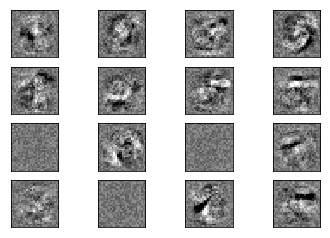

In [6]:
#  繪圖
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()